# 00 Init

## Mount

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting to use py files

In [30]:
import os

In [31]:
os.chdir('/content/drive/MyDrive/Minesweeper [RL]')

In [32]:
# check that os is in right directory
os.getcwd()

'/content/drive/MyDrive/Minesweeper [RL]'

In [33]:
! pip install codes

## Import py files

In [34]:
# baseline : Env, Agent
from codes.Agent.DQNAgentWithoutRules import *
from codes.Trainer.trainerWithoutRules import *
from codes.Environment.env5reward import *

## Import Libraries

# 01 Info

## level dictionary

In [12]:
level = {'easy' : {'map_size':(9,9), 'n_mines' : 10},
         'medium' : {'map_size':(16,16), 'n_mines':40},
         'expert' : {'map_size':(16,30), 'n_mines':99}}

## HYPER PARAMETERS

In [13]:
# Environment settings
MEM_SIZE = 50000
MEM_SIZE_MIN = 1000

# Learning settings
BATCH_SIZE = 64
LEARNING_RATE = 0.01
LEARN_DECAY = 0.999975
LEARN_MIN = 0.001
DISCOUNT = 0.1

# Exploration settings
EPSILON = 0.95
EPSILON_DECAY = 0.99975
EPSILON_MIN = 0.01

# DQN settings
CONV_UNITS = 64
UPDATE_TARGET_EVERY = 5

# 02 Train, Valid

In [14]:
env = MinesweeperEnv(map_size=level['easy']['map_size'],
                     n_mines=level['easy']['n_mines'],
                     rewards={'win':1, 'lose':-1, 'progress':0.3, 'guess':-0.3, 'no_progress' : -0.5})
agent = Limited18DQNAgent(env=env, conv_units=CONV_UNITS)

## TRAIN_PARAMETERS

In [15]:
EPISODES = 50000
PRINT_INTERVAL = 100
TRAIN_RENDER = False

TRAIN_INTERVALS = ['every timestep', 'every episodes']
TRAIN_INTERVAL = TRAIN_INTERVALS[0]

VALID_SAMPLE = 1000
VALID_INTERVAL = 10

In [22]:
# import matplotlib.pyplot as plt
# import time
# import numpy as np
# import pandas as pd

# class Trainer:
#     def __init__(self, env, agent, name, train_start=True):
#         self.env = env
#         self.agent = agent

#         self.progress_list = []
#         self.wins_list = []
#         self.ep_rewards_list = []

#         self.SIMPLE_VALID = 0
#         self.name = name
#         self.tester_agent = DQNAgent(env=env, conv_units=CONV_UNITS)

#         self.best_model_train = None
#         self.best_model_valid = None

#         self.baseline_train = 0
#         self.baseline_valid = 0

#         if train_start:
#             start = time.time()
#             self.train()
#             print(round(time.time() - start, 2))

#             self.visualize_train()
#             self.save_model()

#     def train(self):
#         global VALID_SAMPLE
#         win_rate = 0
#         valid_win_rate = 0

#         for episode in range(EPISODES):
#             self.env.reset()

#             n_clicks = 0
#             done = False
#             episode_reward = 0

#             while not done:
#                 current_state = self.env.state

#                 action = self.agent.get_action(current_state)

#                 next_state, reward, done = self.env.step(action)

#                 episode_reward += reward

#                 self.agent.update_replay_memory((current_state, action, reward, next_state, done))

#                 if TRAIN_INTERVAL == TRAIN_INTERVALS[0]: # every timestep
#                     self.agent.train(done)

#                 n_clicks += 1

#             if TRAIN_INTERVAL == TRAIN_INTERVALS[1]: # every episodes
#                 self.agent.train(done)

#             if TRAIN_RENDER:
#                 self.env.render(self.env.state)
#                 print(episode_reward)

#             self.progress_list.append(n_clicks)
#             self.ep_rewards_list.append(episode_reward)
#             self.wins_list.append(reward == self.env.rewards['win'])

#             if len(self.agent.replay_memory) < MEM_SIZE_MIN:
#                 continue

#             if (episode+1) % PRINT_INTERVAL == 0:
#                 med_progress = np.median(self.progress_list[-PRINT_INTERVAL:])
#                 win_rate = np.sum(self.wins_list[-PRINT_INTERVAL:]) / PRINT_INTERVAL
#                 med_reward = np.median(self.ep_rewards_list[-PRINT_INTERVAL:])

#                 print(f"Episode: [{EPISODES}/{episode+1}], Median progress: {med_progress:.2f}, Median reward: {med_reward:.2f}, Win rate : {win_rate:.2f}, Epsilon: {self.agent.epsilon:.2f}")

#                 if win_rate > self.baseline_train:
#                     self.baseline_train = win_rate
#                     self.best_model_train = self.agent.model.state_dict()

#                     self.SIMPLE_VALID = 10

#             if self.SIMPLE_VALID > 0:
#                     valid_state = self.agent.model.state_dict()
#                     valid_win_rate = self.valid_model(self.env, self.tester_agent, episode, VALID_SAMPLE, valid_state)
#                     self.SIMPLE_VALID -= 1

#             if win_rate > self.baseline_valid:
#                 self.baseline_valid = valid_win_rate
#                 self.best_model_valid = self.agent.model.state_dict()

#     def valid_model(self, env, agent, episode, epoch, model_state):

#         progress_list, wins_list, ep_rewards = [], [], []

#         agent.epsilon = 0.0 # valid에서는 탐험을 꺼준다.

#         agent.model.load_state_dict(model_state)
#         agent.target_model.load_state_dict(model_state)

#         repeated_state = 0

#         for i in range(epoch):

#             env.reset()

#             done = False
#             n_clicks = 0
#             episode_reward = 0

#             while not done:
#                 current_state = env.state

#                 action = agent.get_action(current_state)

#                 next_state, reward, done = env.step(action)

#                 if current_state == next_state:
#                     done = True

#                 episode_reward += reward
#                 n_clicks += 1

#             progress_list.append(n_clicks)
#             ep_rewards.append(episode_reward)

#             if reward == env.rewards['win']:
#                 wins_list.append(1)
#             else:
#                 wins_list.append(0)

#         print(f"Valid n:{epoch}, Median progress: {np.median(progress_list):.2f}, Median reward: {np.median(ep_rewards):.2f}, Win rate : {np.sum(wins_list)/len(wins_list)}")

#         return np.sum(wins_list)/len(wins_list) # 승률을 반환한다.

#     def visualize_train(self, progress=True, win_rates=True, rewards=True, losses=True):
#         progresses = []
#         win_rates = []
#         rewards = []
#         losses = []

#         INTERVAL = 100

#         for start in range(0, len(self.progress_list)-INTERVAL, INTERVAL):
#             progresses.append(sum(self.progress_list[start:start+INTERVAL]) / INTERVAL)
#             win_rates.append(sum(self.wins_list[start:start+INTERVAL]) / INTERVAL)
#             rewards.append(sum(self.ep_rewards_list[start:start+INTERVAL]) / INTERVAL)
#             losses.append(sum(self.agent.losses[start:start+INTERVAL]) / INTERVAL)

#         interval = 500
#         xticks = np.arange(0, len(self.progress_list), interval)

#         if progress:
#             if len(progresses) > 50:
#                 plt.xticks(xticks, [str(x) + 'K' for x in xticks // 10])
#             plt.axhline(y=(sum(self.progress_list)/len(self.progress_list)), color='b', linestyle='-')
#             plt.scatter(range(len(progresses)), progresses, marker='.',alpha=0.3,
#                         color=['red' if x == max(progresses) else 'black' for x in progresses])
#             plt.annotate(max(progresses), (progresses.index(max(progresses))+5, max(progresses)))
#             plt.title(f"Median Progress per {INTERVAL} episodes")
#             plt.show()

#         if win_rates:
#             if len(progresses) > 50:
#                 plt.xticks(xticks, [str(x) + 'K' for x in xticks // 10])
#                 plt.axhline(y=(sum(self.wins_list)/len(self.wins_list)), color='b', linestyle='-')
#                 plt.axhline(y=(sum(self.wins_list[-100:])/len(self.wins_list[-100:])), color='b', linestyle='--')
#             plt.fill_between(range(len(win_rates)), min(win_rates), win_rates, alpha=0.7)
#             plt.scatter(win_rates.index(max(win_rates)), max(win_rates), marker='.', color='r')
#             plt.annotate(max(win_rates), (win_rates.index(max(win_rates))+5, max(win_rates)))
#             plt.title(f"Median Win rate per {INTERVAL} episodes")
#             plt.show()

#         if rewards:
#             if len(progresses) > 50:
#                 plt.xticks(xticks, [str(x) + 'K' for x in xticks // 10])
#                 plt.axhline(y=(sum(self.ep_rewards_list)/len(self.ep_rewards_list)), color='b', linestyle='-')
#             plt.scatter(range(len(rewards)), rewards,
#                         marker='.', alpha=0.3, color=['red' if x == max(rewards) else 'black' for x in rewards])
#             plt.annotate(round(max(rewards),2), (rewards.index(max(rewards))+5, max(rewards)))
#             plt.title(f"Median Episode Reward per {INTERVAL} episodes")
#             plt.show()

#         if losses:
#             if len(progresses) > 50:
#                 plt.xticks(xticks, [str(x) + 'K' for x in xticks // 10])
#             plt.plot(losses)
#             plt.title(f"Median Loss per {INTERVAL} episodes")
#             plt.show()

#     def save_model(self):

#         def save_file(direction, fname, file):
#            with open(os.path.join(direction, f'{fname}.pkl'), 'wb') as f:
#                 pickle.dump(file,f)

#         def create_file(path, name):
#             file_path = path + '/' + name
#             # 파일이 이미 존재하는지 확인
#             if not os.path.exists(file_path):
#                 os.makedirs(file_path)
#                 print(f"파일 '{file_path}'가 생성되었습니다.")
#             else:
#                 print(f"파일 '{file_path}'는 이미 존재합니다.")

#         save_point = {}
#         save_point['n_mines'] = self.env.total_mines
#         save_point['total_episodes'] = len(self.progress_list)
#         save_point['final_model'] = self.agent.model.state_dict()
#         save_point['best_model_train'] = self.best_model_train
#         save_point['best_model_valid'] = self.best_model_valid

#         self.save_point = save_point

#         f_path = '/content/drive/MyDrive/Minesweeper [RL]/models'
#         name = self.name

#         create_file(f_path, name)
#         save_file(f_path + '/' + name, f'{len(self.progress_list)}epi_max_train{self.baseline_train}_valid{self.baseline_valid}',save_point)
#         print('모델이 저장되었습니다.')


In [ ]:
train = Trainer(env, agent, 'basicModelWithBiasWithoutRule')

In [25]:
with open('/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasWithoutRule/200K.pkl', 'wb') as f:
    pickle.dump(train, f)

In [27]:
with open('/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasWithoutRule/150K.pkl', 'rb') as f:
    t = pickle.load(f)

In [24]:
train = Trainer(env, agent, 'basicModelWithBiasWithoutRule',train_start=False)

In [25]:
train.agent = t.agent

train.agent.model.load_state_dict(t.agent.model.state_dict())
train.agent.target_model.load_state_dict(t.agent.target_model.state_dict())
train.agent.epsilon = t.agent.epsilon
train.agent.losses = t.agent.losses
train.progress_list = t.progress_list
train.wins_list = t.wins_list
train.ep_rewards_list = t.ep_rewards_list

train.best_model_train = t.best_model_train
train.best_model_valid = t.best_model_valid

train.baseline_train = t.baseline_train
train.baseline_valid = t.baseline_valid

Episode: [50000/100], Median progress: 15.00, Median reward: 3.15, Win rate : 0.47, Epsilon: 0.01
Episode: [50000/200], Median progress: 13.00, Median reward: 2.85, Win rate : 0.46, Epsilon: 0.01
Episode: [50000/300], Median progress: 15.50, Median reward: 3.75, Win rate : 0.52, Epsilon: 0.01
Episode: [50000/400], Median progress: 14.50, Median reward: 3.30, Win rate : 0.48, Epsilon: 0.01
Episode: [50000/500], Median progress: 15.00, Median reward: 4.00, Win rate : 0.59, Epsilon: 0.01
Episode: [50000/600], Median progress: 14.00, Median reward: 3.70, Win rate : 0.51, Epsilon: 0.01
Episode: [50000/700], Median progress: 14.00, Median reward: 3.25, Win rate : 0.53, Epsilon: 0.01
Episode: [50000/800], Median progress: 14.00, Median reward: 3.30, Win rate : 0.54, Epsilon: 0.01
Episode: [50000/900], Median progress: 14.00, Median reward: 3.10, Win rate : 0.46, Epsilon: 0.01
Episode: [50000/1000], Median progress: 15.00, Median reward: 3.30, Win rate : 0.48, Epsilon: 0.01
Episode: [50000/110

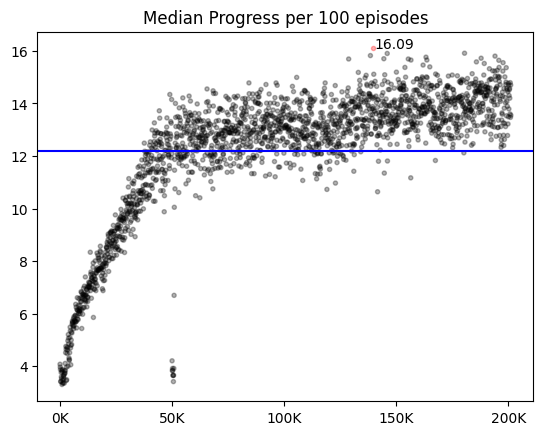

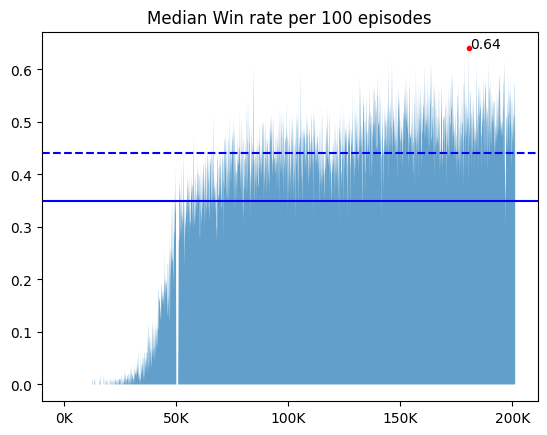

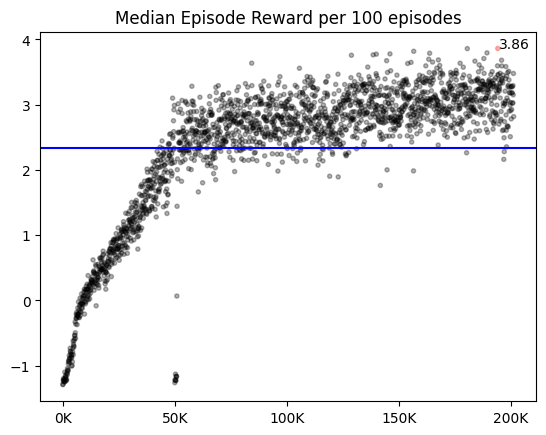

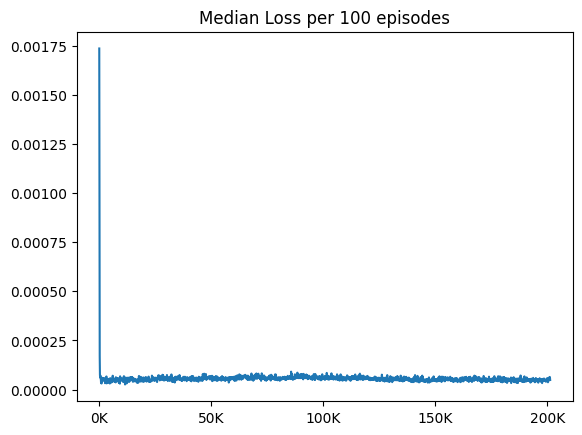

파일 '/content/drive/MyDrive/Minesweeper [RL]/models/basicModelWithBiasWithoutRule'는 이미 존재합니다.
모델이 저장되었습니다.


In [24]:
train.train()
train.visualize_train()
train.save_model()

# 03 Test